In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
data = pd.read_csv('Final.csv')
data.head(10)

,Patient_ID,PerformedDate,Name_calc,Albumin/Creatinine_Res,Lipids_Res,a1c_Res,BP_res,A1C_RF,BP_RF,Lip_RF,Alb_RF,Total_RF
0,1.000100e+12,2017-11-02,Urine Albumin/Creatinine Ratio (ACR),392.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
1,1.000100e+12,2017-10-16,Urine Albumin/Creatinine Ratio (ACR),221.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
2,1.000100e+12,2014-04-07,Urine Albumin/Creatinine Ratio (ACR),9.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
3,1.000100e+12,2014-03-07,Urine Albumin/Creatinine Ratio (ACR),8.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
4,1.000100e+12,2014-02-05,Urine Albumin/Creatinine Ratio (ACR),9.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
5,1.000100e+12,2014-01-17,Urine Albumin/Creatinine Ratio (ACR),61.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
6,1.000100e+12,2019-04-07,Urine Albumin/Creatinine Ratio (ACR),197.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
7,1.000100e+12,2019-03-13,Urine Albumin/Creatinine Ratio (ACR),163.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
8,1.000100e+12,2015-09-01,Urine Albumin/Creatinine Ratio (ACR),7.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
9,1.000100e+12,2015-07-13,Urine Albumin/Creatinine Ratio (ACR),3.0,NaN,NaN,NaN,0,0.0,0.0,1,1.0


In [3]:
datanew = data.loc[data['Name_calc'] == 'Cholesterol in LDL (LDLc)']
datanew = datanew.drop(['Patient_ID', 'Name_calc', 'Albumin/Creatinine_Res', 'a1c_Res', 'BP_res', 'A1C_RF','BP_RF','Lip_RF','Alb_RF','Total_RF'], axis=1)
print(datanew)

        PerformedDate  Lipids_Res
544850     2015-04-21       235.0
544851     2015-02-13        66.0
544852     2017-10-19        64.0
544853     2016-10-14       136.0
544854     2014-03-18       293.0
...               ...         ...
1431292    2018-10-16        29.0
1431293    2018-06-05       247.0
1431294    2019-07-17       222.0
1431295    2019-11-01         3.0
1431296           NaN       326.0

[886447 rows x 2 columns]


In [4]:
datanew['PerformedDate'] = pd.to_datetime(datanew['PerformedDate'], infer_datetime_format=True)
indexedDataset = datanew.set_index(['PerformedDate'])
print(indexedDataset)

               Lipids_Res
PerformedDate            
2015-04-21          235.0
2015-02-13           66.0
2017-10-19           64.0
2016-10-14          136.0
2014-03-18          293.0
...                   ...
2018-10-16           29.0
2018-06-05          247.0
2019-07-17          222.0
2019-11-01            3.0
NaT                 326.0

[886447 rows x 1 columns]


In [5]:
from datetime import datetime

In [6]:
indexedDataset = indexedDataset.dropna()
print(indexedDataset)

               Lipids_Res
PerformedDate            
2015-04-21          235.0
2015-02-13           66.0
2017-10-19           64.0
2016-10-14          136.0
2014-03-18          293.0
...                   ...
2018-10-16           29.0
2018-06-05          247.0
2019-07-17          222.0
2019-11-01            3.0
NaT                 326.0

[856573 rows x 1 columns]


In [7]:
indexedDataset.index = pd.to_datetime(indexedDataset.index)
indexedDataset = indexedDataset.sort_index()
print(indexedDataset)

               Lipids_Res
PerformedDate            
1991-02-27          397.0
1993-02-02          393.0
1994-09-16           39.0
1995-09-05          249.0
1995-09-07          331.0
...                   ...
NaT                 277.0
NaT                 305.0
NaT                 163.0
NaT                  17.0
NaT                 326.0

[856573 rows x 1 columns]


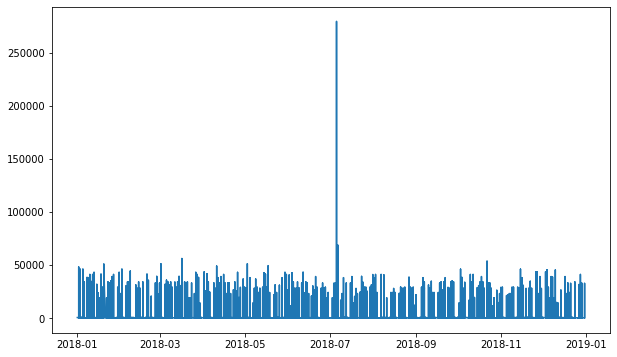

In [8]:
sub = indexedDataset['2018']
plt.plot(sub)

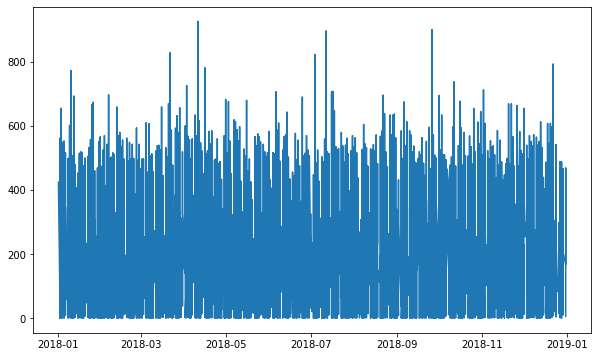

In [9]:
from scipy import stats
new = sub[(np.abs(stats.zscore(sub['Lipids_Res'])) < 3)]
new2 = new.loc[(new!=0).any(axis=1)]
plt.plot(new2)

In [10]:
#Determing rolling statistics
rolmean = new2.rolling(window=12).mean()
rolstd = new2.rolling(window=12).std()
print(rolmean, rolstd)

               Lipids_Res
PerformedDate            
2018-01-01            NaN
2018-01-02            NaN
2018-01-02            NaN
2018-01-02            NaN
2018-01-02            NaN
...                   ...
2018-12-31     188.666667
2018-12-31     186.583333
2018-12-31     178.833333
2018-12-31     164.583333
2018-12-31     155.000000

[79375 rows x 1 columns]                Lipids_Res
PerformedDate            
2018-01-01            NaN
2018-01-02            NaN
2018-01-02            NaN
2018-01-02            NaN
2018-01-02            NaN
...                   ...
2018-12-31     104.381584
2018-12-31     105.918887
2018-12-31      99.175541
2018-12-31      74.300934
2018-12-31      86.798618

[79375 rows x 1 columns]


In [11]:
indexedDataset_logScale = np.log(new2)
print(indexedDataset_logScale)

               Lipids_Res
PerformedDate            
2018-01-01       6.049733
2018-01-02       4.454347
2018-01-02       5.068904
2018-01-02       5.308268
2018-01-02       5.968708
...                   ...
2018-12-31       5.375278
2018-12-31       4.644391
2018-12-31       5.384495
2018-12-31       5.416100
2018-12-31       1.791759

[79375 rows x 1 columns]


In [12]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
print(movingAverage, movingSTD)

               Lipids_Res
PerformedDate            
2018-01-01            NaN
2018-01-02            NaN
2018-01-02            NaN
2018-01-02            NaN
2018-01-02            NaN
...                   ...
2018-12-31       5.087691
2018-12-31       5.069739
2018-12-31       5.040131
2018-12-31       4.993022
2018-12-31       4.742686

[79375 rows x 1 columns]                Lipids_Res
PerformedDate            
2018-01-01            NaN
2018-01-02            NaN
2018-01-02            NaN
2018-01-02            NaN
2018-01-02            NaN
...                   ...
2018-12-31       0.597627
2018-12-31       0.608235
2018-12-31       0.580676
2018-12-31       0.516785
2018-12-31       1.061513

[79375 rows x 1 columns]


In [13]:
# Get the difference between the moving average and the actual number of passengers
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)
#Remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Lipids_Res
PerformedDate,
2018-01-02,-0.004867
2018-01-02,-0.081372
2018-01-02,0.030143
2018-01-02,-0.284217
2018-01-02,0.476503
2018-01-02,-2.146090
2018-01-02,-0.074249
2018-01-02,-2.029066
2018-01-02,0.056067


In [15]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['Lipids_Res'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

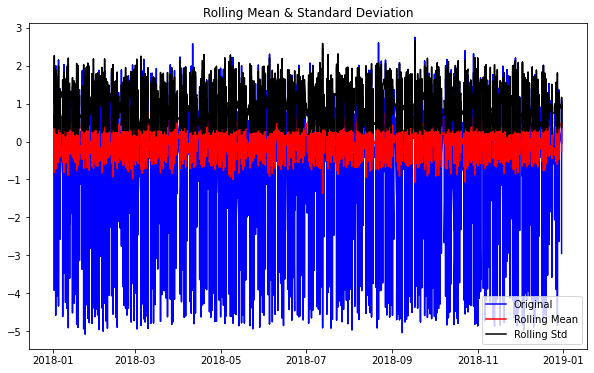

Results of Dickey-Fuller Test:
Test Statistic                   -57.827502
p-value                            0.000000
#Lags Used                        64.000000
Number of Observations Used    79299.000000
Critical Value (1%)               -3.430432
Critical Value (5%)               -2.861576
Critical Value (10%)              -2.566789
dtype: float64


In [16]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 100000000000
test_stationarity(datasetLogScaleMinusMovingAverage)

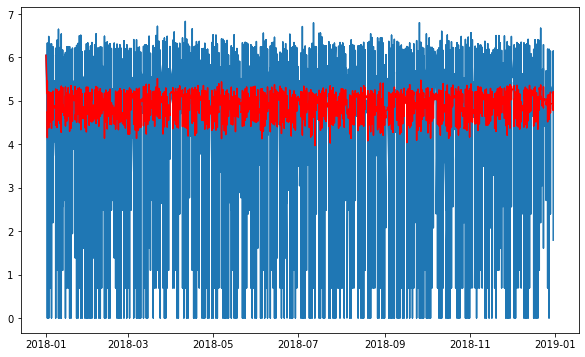

In [17]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

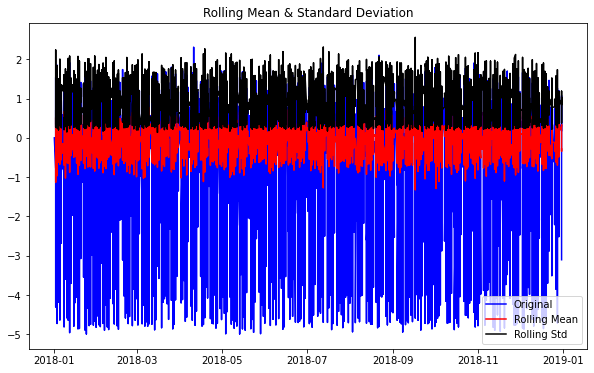

Results of Dickey-Fuller Test:
Test Statistic                   -49.587140
p-value                            0.000000
#Lags Used                        64.000000
Number of Observations Used    79310.000000
Critical Value (1%)               -3.430432
Critical Value (5%)               -2.861576
Critical Value (10%)              -2.566789
dtype: float64


In [18]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

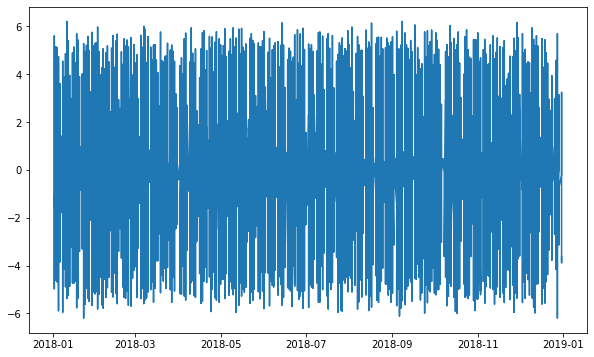

In [19]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

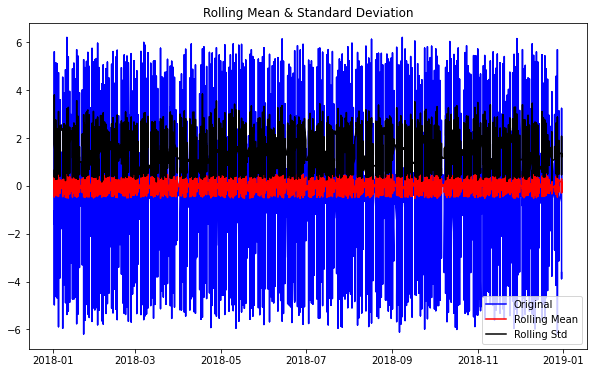

Results of Dickey-Fuller Test:
Test Statistic                   -60.734902
p-value                            0.000000
#Lags Used                        64.000000
Number of Observations Used    79309.000000
Critical Value (1%)               -3.430432
Critical Value (5%)               -2.861576
Critical Value (10%)              -2.566789
dtype: float64


In [21]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

In [22]:
indexedDataset_logScale.index = pd.to_datetime(indexedDataset_logScale.index)

c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


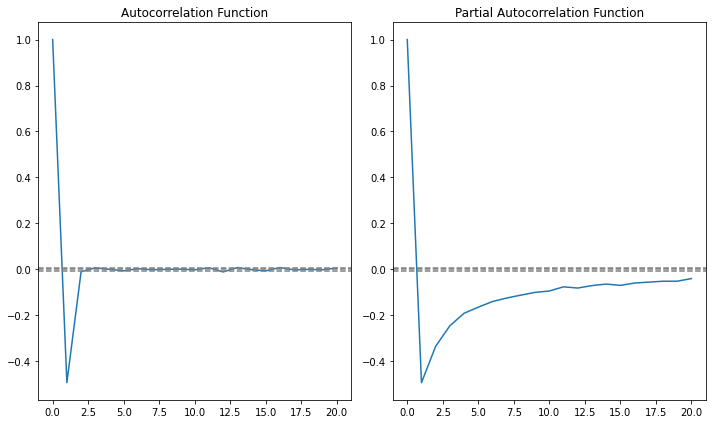

In [23]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')


#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date i

Plotting AR model


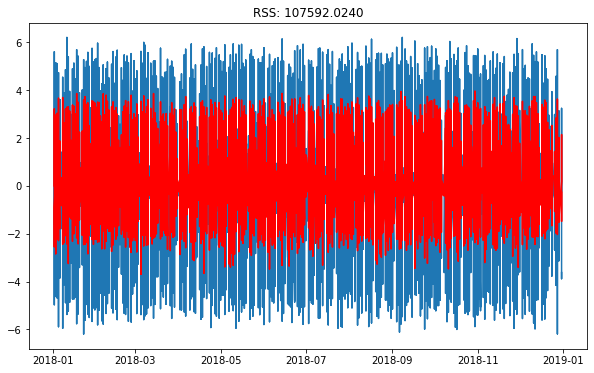

In [24]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(indexedDataset_logScale, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['Lipids_Res'])**2))
print('Plotting AR model')

c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Plotting AR model


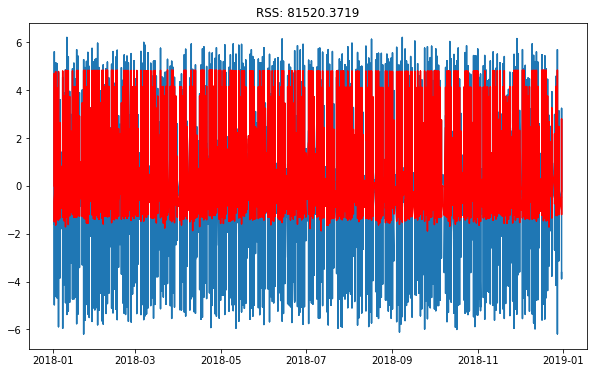

In [25]:
#MA MODEL
model = ARIMA(indexedDataset_logScale, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting['Lipids_Res'])**2))
print('Plotting AR model')

In [26]:
model = ARIMA(indexedDataset_logScale, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['Albumin/Creatinine_Res'])**2))

c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


MemoryError: Unable to allocate 46.9 GiB for an array with shape (79310, 79310) and data type float64

In [27]:
predictions_ARIMA_diff = pd.Series(results_MA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

PerformedDate
2018-01-02    1.716258e-07
2018-01-02    7.826888e-01
2018-01-02    1.246565e-01
2018-01-02   -8.208672e-02
2018-01-02   -5.829705e-01
dtype: float64


In [28]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

PerformedDate
2018-01-02    1.716258e-07
2018-01-02    7.826890e-01
2018-01-02    9.073455e-01
2018-01-02    8.252588e-01
2018-01-02    2.422883e-01
dtype: float64


In [29]:
#predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
#predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
#predictions_ARIMA_log.head()

predictions_ARIMA_log = pd.Series(indexedDataset_logScale.iloc[0,0],index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

PerformedDate
2018-01-01    6.049733
2018-01-02    6.049734
2018-01-02    6.832422
2018-01-02    6.957079
2018-01-02    6.874992
dtype: float64

MemoryError: Unable to allocate 52.1 GiB for an array with shape (6995361935,) and data type int64

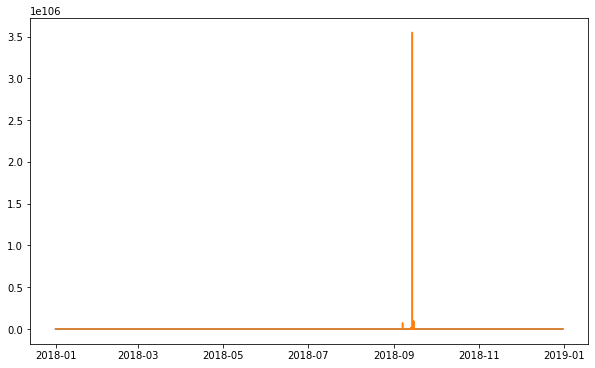

In [31]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(new2)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-indexedDataset['Lipids_Res'])**2)/len(indexedDataset['Lipids_Res'])))